# Introduction to Structural Mechanics ME-104
__Studio 04) Equilibrium in 3D__

Instructors: [Pedro Reis](mailto:Pedro.Reis@epfl.ch), [Till Junge](mailto:till.junge@epfl.ch)

## Learning goals:
- Establish and solve equilibrium equations

## Jupyter Problem 4.1
The square steel plate is uniform and has a mass of $m$. Determine the tension in each cable given that they keep the plate horizontal (note that point $D$ is vertically aligned with the center of mass of the plate).
 
Numerical application:~$m=1800 ~\mathrm{kg}$, $l=1200 ~\mathrm{mm}.$

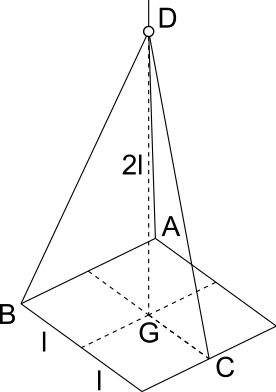

In [2]:
import sympy as sy
sy.init_printing()

In [9]:
# parameters
l, m, g = sy.symbols("l m g", positive=True)
# weight (choosing the x-axis in direction GC, y in BA and z in GD)
F_w = sy.Matrix([0, 0, -m * g])

In [10]:
# geometry
GB = sy.Matrix([-l, -l,   0])
GA = sy.Matrix([-l,  l,   0])
GC = sy.Matrix([ l,  0,   0])
GD = sy.Matrix([ 0,  0, 2*l]) 

BD = GD - GB
AD = GD - GA
CD = GD - GC

n_BD = BD/BD.norm()
n_AD = AD/AD.norm()
n_CD = CD/CD.norm()

In [11]:
# unknowns
T_A, T_B, T_C = sy.symbols("T_A T_B, T_C", positive=True)
F_A, F_B, F_C = T_A*n_AD, T_B*n_BD, T_C*n_CD

In [12]:
# Equilibrium of forces
forces = sy.Eq(sy.Matrix([0,0,0]), F_A + F_B + F_C + F_w)
moments_G = sy.Eq(sy.Matrix([0,0,0]), GA.cross(F_A) + GB.cross(F_B) + GC.cross(F_C))


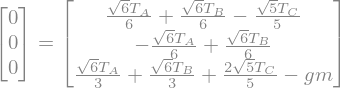

In [13]:
forces

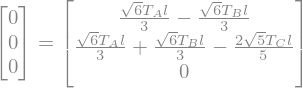

In [14]:
moments_G

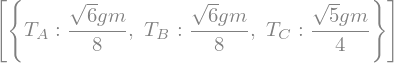

In [18]:
solutions = sy.solve((forces, moments_G), T_A, T_B, T_C, dict=True)
solutions

As expected, exactly one solution was found, let's display it as the symbolic solution asked for in the question:

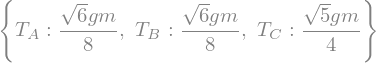

In [19]:
solution = solutions[0]
display(solution)

In [25]:
# numeric evaluation
kilogram, metre, newton = sy.symbols(r"\mathrm{kg} \mathrm{m} \mathrm{N}", positive=True)
numeric_values = {
    m: 1800. * kilogram,
    l: 1.2 * metre,
    g: 9.81 * newton/kilogram
}

numeric_solutions = {
    T_A: solution[T_A].subs(numeric_values).evalf(),
    T_B: solution[T_B].subs(numeric_values).evalf(),
    T_C: solution[T_C].subs(numeric_values).evalf()
}
display(numeric_solutions)

In [26]:
# double-check correctness of result
display((F_A + F_B + F_C + F_w).subs(solution))